# On Educational Equity in California 

## Introduction
Educational equity, also referred to as equity in education, is a measure of achievement, fairness, and opportunity in education. In an academic system that practices educational equity, factors specific to one's personal conditions should not interfere with the potential of academic success. Such academic system serves as a strong foundation for a society that is fair and thriving. However, inequity in education is challenging to avoid, and can be broken down into inequity due to socioeconomic standing, race, gender or disability. 

In the following study, we take a closer look at the status of educational equity in the state of California by analyzing the data on age, education level, gender, ethnicity and sexual orientation of approximately 50000 California residents.  

## Loading, Understanding and Cleaning the Data
The Data is provided by  OkCupid, an online dating app. Let's first load the data:

In [1]:
# Importing the necessary Python packages, loading the data into a Pandas dataframe,
# and providing some preliminary information on the dataset 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('profiles.csv')

print(df.columns)
print(df.shape)

df.head()

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
(59946, 31)


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


The dataset has 59946 rows and 31 columns. The columns that we are interested in are: age, education, ethnicity, income, location, orientation, religion and sex.

Let's try to understand these columns further:

In [2]:
# This block ensures that above 99% of the data is from CA residents

location_list = df['location'].value_counts().index.tolist()
counter_CA = 0
for i in range(len(location_list)):
    if 'california' in location_list[i]:
        counter_CA += df['location'].value_counts()[i]

CA_population_percentage_in_dataset = counter_CA/df.shape[0]
print(CA_population_percentage_in_dataset)
        

0.9984819671037267


/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


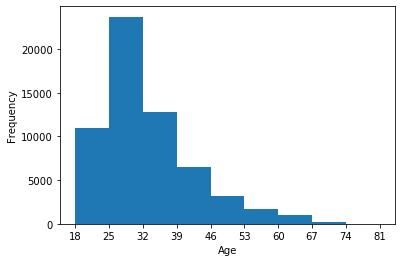

32.3402895939679
30.0
18
110


In [3]:
# Histogram of ages 

plt.hist(df.age, range=(18, 81), bins=9)
plt.xlabel("Age")
plt.ylabel("Frequency")
ax = plt.subplot()
ax.set_xticks([18+7*i for i in range(10)])
plt.show()

# Age statistics

print(df['age'].mean())
print(df['age'].median())
print(df['age'].min())
print(df['age'].max())

In [4]:
# The number of missing data in "age" column
df['age'].isna().sum()

0

In [5]:
# The unique responses in "income" column
df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

More than 80% of the individuals have reported zero income. Let's take a look at their jobs:

In [6]:
# The unique jobs of the individuals who have reported no income
df[df['income'] == -1]['job'].value_counts()

other                                6048
student                              3890
science / tech / engineering         3872
computer / hardware / software       3553
sales / marketing / biz dev          3521
artistic / musical / writer          3397
medicine / health                    3031
education / academia                 2775
banking / financial / real estate    1901
executive / management               1816
entertainment / media                1789
law / legal services                 1164
hospitality / travel                 1019
construction / craftsmanship          664
clerical / administrative             601
political / government                513
rather not say                        347
transportation                        226
retired                               180
unemployed                            172
military                              106
Name: job, dtype: int64

Most of the individuals who have reported zero income have jobs. Therefore, it seems most of them did not report their actual income on OkCupid. As a result, the "income" column is not reliable.

In [7]:
# The number of individuals who did not report their religion
df['religion'].isna().sum()

20226

Approximately 33% of the individuals did not report their religion.

In [8]:
# The unique responses in "ethnicity" column
df['ethnicity'].value_counts()

white                                                                                                      32831
asian                                                                                                       6134
hispanic / latin                                                                                            2823
black                                                                                                       2008
other                                                                                                       1706
hispanic / latin, white                                                                                     1301
indian                                                                                                      1077
asian, white                                                                                                 811
white, other                                                                                    

In [9]:
# The number of missing data in "ethnicity" column
df['ethnicity'].isna().sum()

5680

Around 10% of the individuals did not report their ethnicity. We'll deal with this as we move forward.  

In [10]:
# The unique responses in the "orientation" column
print(df['orientation'].value_counts())
# The number of missing data in "ethnicity" column
print(df['orientation'].isna().sum())

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64
0


In [11]:
# The unique responses in the "sex" column
print(df['sex'].value_counts())
# The number of missing data in the "sex" column
print(df['sex'].isna().sum())

m    35829
f    24117
Name: sex, dtype: int64
0


In [12]:
# The unique responses in the "education" column
print(df['education'].value_counts())
# The number of missing data in "education" column
print(df['education'].isna().sum())

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

Around 11% of the individuals did not report their education level. 

We completely drop the "incme" and "religion" columns. We also remove the missing rows in "education" and "ethnicity" columns. The "sex", "orientation" and "age" columns have no missing data and remain as is. "equity_df" is the dataframe that we use to conduct our educational equity study. 

In [13]:
# Forming the "equity_df" dataframe and cleaning the data

equity_df = df[['age', 'education', 'ethnicity', 'orientation', 'sex']]

equity_df.dropna(inplace=True)
equity_df.reset_index(inplace=True)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
equity_df.drop(columns={'index'}, inplace=True)
print(equity_df.shape)
equity_df.head()

(48774, 5)


/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,age,education,ethnicity,orientation,sex
0,22,working on college/university,"asian, white",straight,m
1,35,working on space camp,white,straight,m
2,23,working on college/university,white,straight,m
3,29,graduated from college/university,"asian, black, other",straight,m
4,29,graduated from college/university,white,straight,m


We are left with a dataframe with 48774 rows and 5 columns. 

## Data Preparation

In what follows, we assign numeric values to different responses in sex, orientation, ethnicity and education columns. 

We assign "1" to "male" and "0" to "female" in the sex column: 

In [15]:
# Assigning numeric values to different responses in the sex column:

equity_df['sex_code'] = equity_df.sex.apply(lambda x: 1 if x == 'm' else 0)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


We assign "1" to "straight" and "0" to all other sexual orientations in the sex column:

In [16]:
# Assigning numeric values to different responses in the orientation column:
equity_df['orientation_code'] = equity_df.orientation.apply(lambda x: 1 if x == 'straight' else 0)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


We assign "1" to "white", "2" to "asian", "3" to "hispanic/latin", "4" to "black" and "5" to all other ethnicities in the ethnicity column:

In [17]:
# Assigning numeric values to different responses in the ethnicity column:

ethnicity_list = []
for i in range(len(equity_df['ethnicity'].value_counts().index)):
    ethnicity_list.append(equity_df['ethnicity'].value_counts().index[i])

ethnicity_mapping = {}
for i in range(len(equity_df['ethnicity'].value_counts().index)):
    if equity_df['ethnicity'].value_counts().index[i] == 'white':
        ethnicity_mapping.update({equity_df['ethnicity'].value_counts().index[i]: 1})
    elif equity_df['ethnicity'].value_counts().index[i] == 'asian':
        ethnicity_mapping.update({equity_df['ethnicity'].value_counts().index[i]: 2})
    elif equity_df['ethnicity'].value_counts().index[i] == 'hispanic / latin':
        ethnicity_mapping.update({equity_df['ethnicity'].value_counts().index[i]: 3})
    elif equity_df['ethnicity'].value_counts().index[i] == 'black':
        ethnicity_mapping.update({equity_df['ethnicity'].value_counts().index[i]: 4})
    else:
        ethnicity_mapping.update({equity_df['ethnicity'].value_counts().index[i]: 5})

equity_df['ethnicity_code'] = equity_df.ethnicity.map(ethnicity_mapping)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We reduce the data to three categories in the education column: 1) below college level, 2) college level, 3) above college level. Then, we assign "1" to "below college", "2" to "college" and "3" to "above college":   

In [18]:
# Reducing the data and assigning numeric values to the reduced data in the education column:

education_level_mapping = {"graduated from college/university": 2, "graduated from masters program": 3,
                           "working on college/university": 1, "working on masters program": 3,
                           "graduated from two-year college": 1, "graduated from high school": 1,
                           "graduated from ph.d program": 3, "graduated from law school": 3,
                           "working on two-year college": 1, "dropped out of college/university": 1,
                           "working on ph.d program": 3, "college/university": 2,
                           "graduated from space camp": 1, "dropped out of space camp": 1,
                           "graduated from med school": 3, "working on space camp": 1, 
                           "working on law school": 3, "working on med school": 3,
                           "two-year college": 1, "dropped out of two-year college": 1,
                           "dropped out of masters program": 2, "dropped out of ph.d program": 2,
                           "dropped out of high school": 1, "masters program": 3, 
                           "working on high school": 1, "high school": 1,
                           "space camp": 1, "ph.d program": 3,
                           "dropped out of law school": 2, "law school": 3, 
                           "dropped out of med school": 2, "med school": 3
                          }

equity_df['education_level_code'] = equity_df.education.map(education_level_mapping)

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
# Dropping the non-numeric columns in equity.df
equity_df.drop(['education', 'ethnicity', 'orientation', 'sex'], axis=1, inplace=True)

# Adding a new column to do aggregate statistics on
equity_df['aggregate_col'] = equity_df.index

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Here is how the dataframe prepared for analysis looks like: 

In [20]:
equity_df.head()

,age,sex_code,orientation_code,ethnicity_code,education_level_code,aggregate_col
0,22,1,1,5,1,0
1,35,1,1,1,1,1
2,23,1,1,1,1,2
3,29,1,1,5,2,3
4,29,1,1,1,2,4


## Exploratory Data Analysis

Let's find out how gender affects the education level distribution:

In [21]:
# Finding out the distribution of education level for both genders

equity_df['sex_code'].value_counts()
num_females = equity_df['sex_code'].value_counts()[0]
num_males = equity_df['sex_code'].value_counts()[1]

population_count_grouped_by_sex_education = equity_df.groupby(['education_level_code', 'sex_code'])['aggregate_col'].count().reset_index()

population_count_grouped_by_sex_education['percentage_of_population'] = population_count_grouped_by_sex_education.apply(lambda row: (row['aggregate_col']/num_females)\
                                                               if\
                                                               (row['sex_code']==0)\
                                                               else\
                                                               (row['aggregate_col']/num_males), axis=1)

population_count_grouped_by_sex_education.rename(columns={'aggregate_col': 'population'}, inplace=True)

population_count_grouped_by_sex_education

,education_level_code,sex_code,population,percentage_of_population
0,1,0,4225,0.214511
1,1,1,7916,0.272233
2,2,0,9238,0.469029
3,2,1,13648,0.469358
4,3,0,6233,0.316460
5,3,1,7514,0.258408


Let's visualize this data:

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


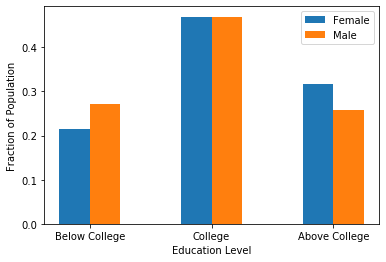

In [22]:
# Plotting the distribution of education levels for both genders

population_percentage = population_count_grouped_by_sex_education['percentage_of_population'].tolist()
female_population_list = []
male_population_list = []
for i in range(len(population_percentage)):
    if i%2 == 0:
        female_population_list.append(population_percentage[i])
    else:
        male_population_list.append(population_percentage[i])
        
width = 0.25
plt.bar([(i-width/2) for i in range(1,4)], female_population_list, width)
plt.bar([(i+width/2) for i in range(1,4)], male_population_list, width)
ax = plt.subplot()
ax.set_xticks(range(1,4))
ax.set_xticklabels(['Below College', 'College', 'Above College'])
plt.ylabel('Fraction of Population')
plt.xlabel('Education Level')
plt.legend(['Female', 'Male'])

Females have a slight advantage over males. Let's take a look the average education level for each gender: 

In [23]:
# Finding the average education level for each gender 

education_mean_grouped_by_sex = equity_df.groupby(['sex_code'])['education_level_code'].mean().reset_index()
education_mean_grouped_by_sex.rename(columns={'education_level_code': 'average_education_level'}, inplace=True)
education_mean_grouped_by_sex

,sex_code,average_education_level
0,0,2.101950
1,1,1.986175


Next, we repeat the above process for sexual orientation:

In [24]:
# Finding out the distribution of education level for both straight and non-straight orientations

equity_df['orientation_code'].value_counts()
num_straights = equity_df['orientation_code'].value_counts()[1]
num_others = equity_df['orientation_code'].value_counts()[0]

population_count_grouped_by_orientation_education = equity_df.groupby(['education_level_code', 'orientation_code'])['aggregate_col'].count().reset_index()

population_count_grouped_by_orientation_education['percentage_of_population'] = population_count_grouped_by_orientation_education.apply(lambda row: (row['aggregate_col']/num_others)\
                                                               if\
                                                               (row['orientation_code']==0)\
                                                               else\
                                                               (row['aggregate_col']/num_straights), axis=1)

population_count_grouped_by_orientation_education.rename(columns={'aggregate_col': 'population'}, inplace=True)
population_count_grouped_by_orientation_education

,education_level_code,orientation_code,population,percentage_of_population
0,1,0,2114,0.316514
1,1,1,10027,0.238199
2,2,0,2809,0.420572
3,2,1,20077,0.476945
4,3,0,1756,0.262914
5,3,1,11991,0.284856


/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


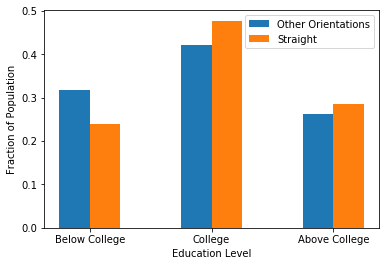

In [25]:
# Plotting the distribution of education level for both straight and non-straight orientations

population_percentage = population_count_grouped_by_orientation_education['percentage_of_population'].tolist()
others_population_list = []
straights_population_list = []
for i in range(len(population_percentage)):
    if i%2 == 0:
        others_population_list.append(population_percentage[i])
    else:
        straights_population_list.append(population_percentage[i])
        
width = 0.25
plt.bar([(i-width/2) for i in range(1,4)], others_population_list, width)
plt.bar([(i+width/2) for i in range(1,4)], straights_population_list, width)
ax = plt.subplot()
ax.set_xticks(range(1,4))
ax.set_xticklabels(['Below College', 'College', 'Above College'])
plt.ylabel('Fraction of Population')
plt.xlabel('Education Level')
plt.legend(['Other Orientations', 'Straight'])

Straights have a slight advantage over non-straights. Let's take a look the average education level for both categories: 

In [26]:
# Finding the average education level for both straights and non-straights 

education_mean_grouped_by_orientation = equity_df.groupby(['orientation_code'])['education_level_code'].mean().reset_index()
education_mean_grouped_by_orientation.rename(columns={'education_level_code': 'average_education_level'}, inplace=True)
education_mean_grouped_by_orientation

,orientation_code,average_education_level
0,0,1.946399
1,1,2.046656


Finally, we re-do this process for ethnicity: 

In [27]:
# Finding out the distribution of education level for different ethnicities

equity_df['ethnicity_code'].value_counts()
num_whites = equity_df['ethnicity_code'].value_counts()[1]
num_asians = equity_df['ethnicity_code'].value_counts()[2]
num_latins = equity_df['ethnicity_code'].value_counts()[3]
num_blacks = equity_df['ethnicity_code'].value_counts()[4]
num_others = equity_df['ethnicity_code'].value_counts()[5]

population_count_grouped_by_ethnicity_education = equity_df.groupby(['education_level_code', 'ethnicity_code'])['aggregate_col'].count().reset_index()

population_count_grouped_by_ethnicity_education['percentage_of_population'] = population_count_grouped_by_ethnicity_education.apply(lambda row: (row['aggregate_col']/num_whites)\
                                                               if\
                                                               (row['ethnicity_code']==1)\
                                                               else\
                                                               ((row['aggregate_col']/num_asians)\
                                                               if\
                                                               (row['ethnicity_code']==2)\
                                                               else\
                                                               ((row['aggregate_col']/num_latins)\
                                                               if\
                                                               (row['ethnicity_code']==3)\
                                                               else\
                                                               ((row['aggregate_col']/num_blacks\
                                                                if\
                                                                (row['ethnicity_code']==4)\
                                                                else\
                                                                (row['aggregate_col']/num_others))))), axis=1)

population_count_grouped_by_ethnicity_education.rename(columns={'aggregate_col': 'population'}, inplace=True)
population_count_grouped_by_ethnicity_education

,education_level_code,ethnicity_code,population,percentage_of_population
0,1,1,6323,0.212281
1,1,2,947,0.170354
2,1,3,1033,0.440888
3,1,4,733,0.416005
4,1,5,3105,0.333012
5,2,1,14478,0.486067
6,2,2,3026,0.544343
7,2,3,937,0.399915
8,2,4,613,0.347900
9,2,5,3832,0.410982


/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


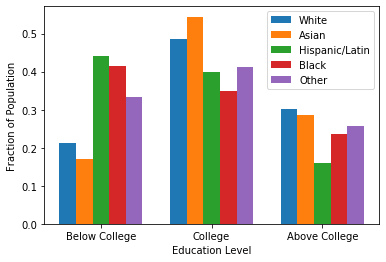

In [28]:
# Plotting the distribution of education level for different ethnicities 

population_percentage = population_count_grouped_by_ethnicity_education['percentage_of_population'].tolist()
whites_population_list = []
asians_population_list = []
latins_population_list = []
blacks_population_list = []
others_population_list = []
for i in range(len(population_percentage)):
    if i%5 == 0:
        whites_population_list.append(population_percentage[i])
    elif i%5 == 1:
        asians_population_list.append(population_percentage[i])
    elif i%5 == 2:
        latins_population_list.append(population_percentage[i])
    elif i%5 == 3:
        blacks_population_list.append(population_percentage[i])
    else:
        others_population_list.append(population_percentage[i])        
        
width = 0.15

plt.bar([(i-2*width) for i in range(1,4)], whites_population_list, width)
plt.bar([(i-width) for i in range(1,4)], asians_population_list, width)
plt.bar([i for i in range(1,4)], latins_population_list, width)
plt.bar([(i+width) for i in range(1,4)], blacks_population_list, width)
plt.bar([(i+2*width) for i in range(1,4)], others_population_list, width)

ax = plt.subplot()
ax.set_xticks(range(1,4))
ax.set_xticklabels(['Below College', 'College', 'Above College'])
plt.ylabel('Fraction of Population')
plt.xlabel('Education Level')
plt.legend(['White', 'Asian', 'Hispanic/Latin', 'Black', 'Other'])

Whites and Asians have a clear advantage over other ethnicities. The education level distribution is more significantly affectted by ethnicity than gender and orientation. Let's take a look at the average education level for each ethnicity: 

In [29]:
# Finding the average education level for different ethnicities

education_mean_grouped_by_ethnicity = equity_df.groupby(['ethnicity_code'])['education_level_code'].mean().reset_index()
education_mean_grouped_by_ethnicity.rename(columns={'education_level_code': 'average_education_level'}, inplace=True)
education_mean_grouped_by_ethnicity

,ethnicity_code,average_education_level
0,1,2.089371
1,2,2.114949
2,3,1.718310
3,4,1.820091
4,5,1.922994


Let's visualize this data:

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0.5, 0, 'Ethnicity')

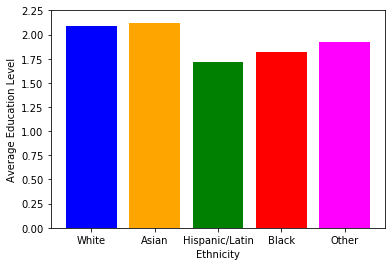

In [30]:
# Plotting the average education level for different ethnicities 

plt.bar(education_mean_grouped_by_ethnicity['ethnicity_code'], education_mean_grouped_by_ethnicity['average_education_level'], color=('blue', 'orange', 'green', 'red', 'magenta'))
plt.ylim([0, 2.25])
ax = plt.subplot()
ax.set_xticks(range(1,6))
ax.set_xticklabels(['White', 'Asian', 'Hispanic/Latin', 'Black', 'Other'])
plt.ylabel('Average Education Level')
plt.xlabel('Ethnicity')

Age is not a factor in educational equity, however, we are interested in finding out how average education level depends on age:

In [31]:
# Finding the average age for each education level

age_mean_grouped_by_education = equity_df.groupby('education_level_code')['age'].mean().reset_index()
age_mean_grouped_by_education

,education_level_code,age
0,1,28.912363
1,2,32.596522
2,3,35.198807


Let's visualize this data:

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0.5, 0, 'Education Level')

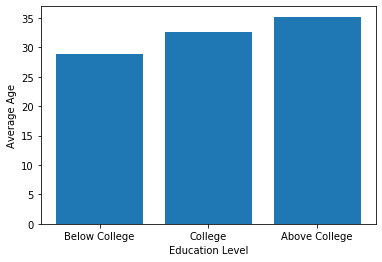

In [32]:
# Plotting average age vs. education level 

plt.bar(range(1,4), age_mean_grouped_by_education['age'])
ax = plt.subplot()
ax.set_xticks(range(1,4))
ax.set_xticklabels(['Below College', 'College', 'Above College'])
plt.ylabel('Average Age')
plt.xlabel('Education Level')

As expected, there is a positive linear correlation between age and education level.

## Measuring Educational Inequity Using KNN Algorithem  

Around 46.9% of the individuals have the education level of "college". This means, if we predict all the individuals belong to the "college" category, our simple algorithm has an accuray of 46.9%. We call this the baseline accuracy.

In [33]:
# Finding out what portion of the individuals have the education level of "college"
college_pop = equity_df[equity_df['education_level_code'] == 2].shape[0]
total_pop = equity_df.shape[0] 
simplest_education_level_predictor_accuracy = college_pop/total_pop
print(simplest_education_level_predictor_accuracy)

0.46922540697912823


In what follows, we train a KNN algorithm to predict the individual's education level based on gender, sexual orientation and ethnicity. 

(9755, 3)
0.4805740645822655


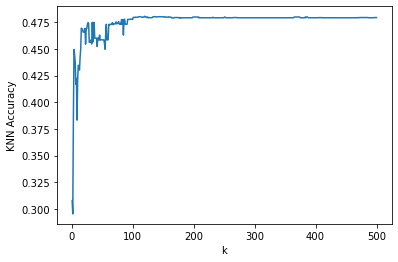

In [34]:
# Importing the Scikit-learn module, normalizing the data, training and testing 
# a KNN model to predict education level based on ethnicity, gender and sexual orientation
# and finding the optimal k

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feature_data = equity_df[['ethnicity_code', 'orientation_code', 'sex_code']]

x = feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)
labels = equity_df['education_level_code']

x_train, x_test, y_train, y_test = train_test_split(feature_data, labels, test_size=0.2, random_state=1)
print(x_test.shape)

scores = []
for k in range(1, 501):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    scores.append(classifier.score(x_test, y_test))

plt.plot(range(1, 501), scores)
plt.xlabel('k')
plt.ylabel('KNN Accuracy')

print(max(scores))

The KNN accuracy (i.e. 48%) is slightly larger than the baseline accuray (i.e. %46.9). In an ideal society that practices educational equity, having access to the gender, sexual orientation and ethnicity information should not effcet the baseline accuracy. The added accuracy is a result of educational inequity. This added accuray devided by the baseline accuracy which is 2.35% in CA can be thought of as some measure of educational inequity.  

Age is not a factor in educational inequity. However, we are interested in finding how adding age to the inputs improves the KNN model accuray: 

(9755, 4)
0.5290620194771912


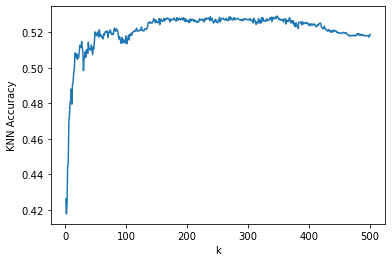

In [35]:
# Finding out how adding age to the inputs improves the KNN model accuracy

feature_data = equity_df[['age', 'ethnicity_code', 'orientation_code', 'sex_code']]

x = feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)
labels = equity_df['education_level_code']

x_train, x_test, y_train, y_test = train_test_split(feature_data, labels, test_size=0.2, random_state=1)
print(x_test.shape)

scores = []
for k in range(1, 501):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    scores.append(classifier.score(x_test, y_test))

plt.plot(range(1, 501), scores)
plt.xlabel('k')
plt.ylabel('KNN Accuracy')

print(max(scores))

Having access to the age information, boosts the KNN accuracy to 53%. 

# Conclusion

In this project, we looked at the educational equity in CA based on the information on age, gender, sexual orientation, ethnicity and education level of approximately 50000 individuals using a dataset provided by OkCupid, an online dating app. 

We showed that ethnicity has a more significant effect on the education level distribution than gender and sexual orientation. On average, whites and asians have a higher level of education than other ethnicities. 

We then trained a KNN algorithm to predict the education level of individuals based on their gender, ethnicity and sexual orientation. In an ideal society that practices educational equity, the accuracy of the KNN model should not be higher than the baseline accuracy (which is equal to the population with the most common education level over the total population). The accuray of the KNN model turned out to be higher than the baseline accuray as a result of educational inequity. This added accuray devided by the baseline accuracy can be though of as some measure of educational inequity (2.35% in CA).   

As next steps, It is necessary to analyze more data and verify the trends that we found in the current dataset. It would be interesting to compare educational inequity in CA with other states. We are also interested in gathering data on socioeconomic standing and investigating the effects of that on educational equity. 